# Data Acquisition

In [ ]:
from google.colab import files
files.upload()

# Data Understanding

Import Library

In [ ]:
import numpy as np
import pandas as pd

Load Data

In [ ]:
data = pd.read_csv('Baby Birth Predict.csv')
data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Bulan                  68 non-null     int64  
 1    Tahun                 68 non-null     int64  
 2    Provinsi              68 non-null     int64  
 3   Jumlah Kelahiran Bayi  67 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 2.2 KB


In [ ]:
data.isnull().sum()

Bulan                    0
 Tahun                   0
 Provinsi                0
Jumlah Kelahiran Bayi    1
dtype: int64

# Data Preparation

Data Imputation 

In [ ]:
data ['Jumlah Kelahiran Bayi'] = data ['Jumlah Kelahiran Bayi'].fillna((data['Jumlah Kelahiran Bayi'].median()))
data

,Bulan,Tahun,Provinsi,Jumlah Kelahiran Bayi
0,1,2012,1,25.0
1,1,2012,2,32.0
2,1,2012,3,26.0
3,1,2012,4,42.0
4,1,2012,5,75.0
...,...,...,...,...
63,1,2017,30,46.0
64,1,2017,31,51.0
65,1,2017,32,57.0
66,1,2017,33,39.0


In [ ]:
data.isnull().sum()

Bulan                    0
 Tahun                   0
 Provinsi                0
Jumlah Kelahiran Bayi    0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ex = ['Bulan', 'Tahun', 'Provinsi', 'Jumlah Kelahiran Bayi']
for i in data.columns:
  if i not in ex:
    scaler = MinMaxScaler()
    data[i] = scaler.fit_transform(data[i].values.reshape(-1,1))

data.head()

,Bulan,Tahun,Provinsi,Jumlah Kelahiran Bayi
0,1,0.0,0.000000,25.0
1,1,0.0,0.030303,32.0
2,1,0.0,0.060606,26.0
3,1,0.0,0.090909,42.0
4,1,0.0,0.121212,75.0


Feature Selection

In [ ]:
x = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values
print(x.shape)
print(y.shape)

(68, 3)
(68,)


Pembagian dataset train-test

In [ ]:
from sklearn.model_selection import train_test_split

x_latih, x_uji, y_latih, y_uji = train_test_split(x,y,train_size=0.8,random_state=0)

# Modelling

Pembuatan Arsitektur

In [ ]:
import tensorflow as tf
model=tf.keras.models.Sequential([])
model.add(tf.keras.layers.Dense(units=2,activation='relu',input_shape=(3,)))
model.add(tf.keras.layers.Dense(units=1))

model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(0.01))

Training

In [ ]:
  model.fit(x_latih, y_latih, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 48.1155
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 47.9726
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 47.8357
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 47.6985
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 47.5631
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 47.4236
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 47.2894
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 47.1527
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 47.0187
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 46.8847
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - loss: 46.7477
Epoch 12/100
2/2 [==============================] - 0s 5ms/step - loss: 46.6134
Epoch 13/100
2/2 [==============================

In [ ]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 2)                 8         
                                                                 
 dense_61 (Dense)            (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


Evaluasi

In [ ]:
model.evaluate(x_latih,y_latih)

2/2 [==============================] - 0s 6ms/step - loss: 22.7069


22.70693588256836

1/1 [==============================] - 0s 26ms/step


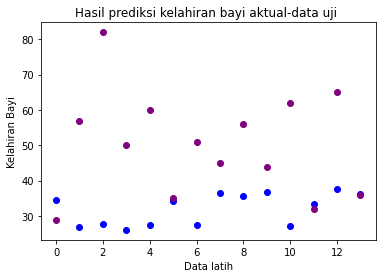

In [ ]:
import matplotlib.pyplot as plt

hasil=model.predict(x_uji)
a=range(len(y_uji))

plt.scatter(a,hasil,color='blue')
plt.scatter(a,y_uji,color='purple')
plt.title("Hasil prediksi kelahiran bayi aktual-data uji ")
plt.xlabel("Data latih")
plt.ylabel("Kelahiran Bayi")
plt.show()